## Reinforcement Learning: Project 1
## Multi-armed Bandits

The purpose of the first part of this project is to verify the results of running multiarmed bandits with Epsilon greedy iterations of 0 (greedy), 0.1 and 0.01. The result will be a line chart showing the average rewards distributions over 1000 steps for 2000 tasks. The second part of this project is to ingest a dataset and determine the same average reward distributions over 10,000 steps for 500 tasks.   
The process was to run each of the parts through several iterations of steps in order to see the progression of the mean reward increase. A cumulative counter was also used to determine the total reward per arm.

In [181]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [182]:
class bandit:
    def __init__(self, arms, type, steps):
        self.n = 0
        self.steps = steps
        self.arms = arms
        self.type = type
        self.mean_r = 0

        self.arm_n = np.zeros(arms)
        self.reward = np.zeros(steps)
        self.arm_r = np.zeros(arms)
        self.arm_tr = np.zeros(arms)
        # unknown mean reward of a action
        self.meansdist = np.random.normal(0, 1, arms)
        #print(self.meansdist)
        # cumulative reward counter for ds
        self.totrewardarm = np.zeros(arms)
        self.optimalList = np.zeros(self.steps)
        self.allr = []

    def run(self, ds): 
        for i in range(self.steps):
            rewardsEachArm = np.zeros(self.arms)
            # find random numbers and determine arm choice
            rn = np.random.rand()  
            if self.type == 0 and self.n == 0:
                act = np.random.choice(self.arms)     
            elif rn < self.type:
                act = np.random.choice(self.arms)
            else:
                act = np.argmax(self.arm_r)

            # increment counters
            self.n += 1
            self.arm_n[act] += 1
            
            # determine reward from Gaussian distribution with q*(a) as mean as varaiance 1
            if isinstance(ds, pd.DataFrame):
                reward = ds.iat[i, act]

            else: 
                #md = self.meansdist.copy()
                for r in range(len(rewardsEachArm)):
                    rewardsEachArm[r] = np.random.normal(self.meansdist[r], 1)  
                reward = rewardsEachArm[act]
                if reward == rewardsEachArm.max():
                    self.optimalList[i] = 1

            # determine the mean reward and reward for the arm chosen, new estimates
            self.mean_r = self.mean_r + (reward - self.mean_r) / self.n
            self.arm_r[act] = self.arm_r[act] + (reward - self.arm_r[act]) / self.arm_n[act]

            if reward > self.arm_tr[act]:
                self.arm_tr[act] = reward
        
            # update the reward array for each step
            self.reward[i] = self.mean_r

            # cumulative reward counter for ds
            self.totrewardarm[act] += reward

            self.allr.append(rewardsEachArm)

    
    def reset(self):
        self.n = 0
        self.arm_n = np.zeros(self.arms)
        self.mean_r = 0
        self.reward = np.zeros(self.steps)
        self.arm_r = np.zeros(self.arms)
    

In [183]:
def executeLearning(arms, steps, tasks, ds):
    # establish the number of arms, steps and tasks
    arms = arms
    steps = steps
    tasks = tasks

    # set up the long-term reward arrays for each type
    greedy_r = np.zeros(steps)
    ep01_r = np.zeros(steps)
    ep1_r = np.zeros(steps)
    master_r = {}
    master_opt = {}

    greedy_opt = np.zeros(steps)
    ep01_opt = np.zeros(steps)
    ep1_opt = np.zeros(steps)

    # task reward ds
    greedy_taskr = np.zeros(tasks)
    ep01_taskr = np.zeros(tasks)
    ep1_taskr = np.zeros(tasks)

    # hold max values for each arm over tasks
    greedy_cumrewardarm = np.zeros(arms)
    ep01_taskr_cumrewardarm = np.zeros(arms)
    ep1_taskr_cumrewardarm = np.zeros(arms)

    # hold max values for each arm over tasks
    greedy_totrewardarm = np.zeros(arms)
    ep01_taskr_totrewardarm = np.zeros(arms)
    ep1_taskr_totrewardarm = np.zeros(arms)

    # list to hold cumrewardarm arrays
    armrewards = []
    totarmrewards = []

    optimal = np.zeros(steps)

    for i in range(tasks):
        # initialize each type
        greedy = bandit(arms, 0, steps)
        e01 = bandit(arms, 0.01, steps)
        e1 = bandit(arms, 0.1, steps)

        # run learning action (pull arm) this is done the number of steps times
        greedy.run(ds)
        e01.run(ds)
        e1.run(ds)

        # deteremine the long-term rewards
        greedy_r = greedy_r + (greedy.reward - greedy_r) / (i + 1)
        ep01_r = ep01_r + (e01.reward - ep01_r) / (i + 1)
        ep1_r = ep1_r + (e1.reward - ep1_r) / (i + 1)

        # deteremine the long-term rewards
        #print(e01.optimalList)
        greedy_opt = greedy_opt + (greedy.optimalList - greedy_opt) / (i + 1)
        ep01_opt = ep01_opt + (e01.optimalList - ep01_opt) / (i + 1)
        ep1_opt = ep1_opt + (e1.optimalList - ep1_opt) / (i + 1)

        #print(ep01_opt)


        # Optimal Code (doesn't work)
        #for s in range(steps):
        #    optimal[s] += e01.optimalList[s]

        #optList = [(x*100) / tasks for x in optimal]


        # Average Reward By Arm ---------
        # determine max values for each arm in cumrewardarm
        for c in range(len(greedy_cumrewardarm)):
            if greedy.arm_tr[c] > greedy_cumrewardarm[c]:
                greedy_cumrewardarm[c] = greedy.arm_r[c]

        # determine max values for each arm in cumrewardarm
        for c in range(len(ep01_taskr_cumrewardarm)):
            if e01.arm_tr[c] > ep01_taskr_cumrewardarm[c]:
                ep01_taskr_cumrewardarm[c] = e01.arm_r[c]

        # determine max values for each arm in cumrewardarm
        for c in range(len(ep1_taskr_cumrewardarm)):
            if e1.arm_tr[c] > ep1_taskr_cumrewardarm[c]:
                ep1_taskr_cumrewardarm[c] = e1.arm_r[c]


    
    # Optimal Code Doesnt Work
    #print(optList)

    #print(greedy.arm_r)
    #print(greedy.allr[-1])
    
    # create multidimensional array to hold cumrewardarm vals
    armrewards.append(greedy_cumrewardarm)
    armrewards.append(ep01_taskr_cumrewardarm)
    armrewards.append(ep1_taskr_cumrewardarm)

    # create multidimensional array to hold cumrewardarm vals
    totarmrewards.append(greedy_totrewardarm)
    totarmrewards.append(ep01_taskr_totrewardarm)
    totarmrewards.append(ep1_taskr_totrewardarm)

    master_r['greedy'] = greedy_r
    master_r['ep01'] = ep01_r
    master_r['ep1'] = ep1_r

    master_opt['greedy'] = greedy_opt
    master_opt['ep01'] = ep01_opt
    master_opt['ep1'] = ep1_opt

    greedy.reset()
    e01.reset()
    e1.reset()

    return master_r, armrewards, totarmrewards, master_opt



In [184]:
def determineMaxReward(armrewards):
    gmaindex = np.argmax(armrewards[0])
    e01maindex = np.argmax(armrewards[1])
    e1maindex = np.argmax(armrewards[2])
    maxmethod = 0

    # Determine the max reward and step that produced it
    maxarms = [gmaindex+1, e01maindex+1, e1maindex+1]
    maxvals = [ round(armrewards[0][gmaindex],2), round(armrewards[1][e01maindex],2), round(armrewards[2][e1maindex],2)]
    maxval = max(maxvals)
    maxarm = maxarms[maxvals.index(maxval)]
    maxmethod = maxvals.index(max(maxvals))

    return maxval, maxarm, maxmethod

In [185]:
def drawAvgChart(stepsarr, rewards, type):
    #print(rewards[10])
    fig,axs = plt.subplots(2,2, figsize=(10,10), constrained_layout=True)
    
    axs[0, 0].plot(rewards[stepsarr[0]]['greedy'])
    axs[0, 0].plot(rewards[stepsarr[0]]['ep01'])
    axs[0, 0].plot(rewards[stepsarr[0]]['ep1'])
    axs[0, 0].set_title(f'{stepsarr[0]} Steps')

    axs[0, 1].plot(rewards[stepsarr[1]]['greedy'])
    axs[0, 1].plot(rewards[stepsarr[1]]['ep01'])
    axs[0, 1].plot(rewards[stepsarr[1]]['ep1'])
    axs[0, 1].set_title(f'{stepsarr[1]} Steps')

    axs[1, 0].plot(rewards[stepsarr[2]]['greedy'])
    axs[1, 0].plot(rewards[stepsarr[2]]['ep01'])
    axs[1, 0].plot(rewards[stepsarr[2]]['ep1'])
    axs[1, 0].set_title(f'{stepsarr[2]} Steps')

    axs[1, 1].plot(rewards[stepsarr[3]]['greedy'])
    axs[1, 1].plot(rewards[stepsarr[3]]['ep01'])
    axs[1, 1].plot(rewards[stepsarr[3]]['ep1'])
    axs[1, 1].set_title(f'{stepsarr[3]} Steps')

    fig.legend([axs[0, 0], axs[0, 1], axs[1,0], axs[1, 1]],
                labels=["greedy", "epsilon=0.01", "epsilon=0.1"],
                loc="center right",
                borderaxespad=0.1)

    plt.subplots_adjust(right=0.85)
    if type == 'avg':
        fig.suptitle('Average Rewards over 2000 Tasks')
        for ax in axs.flat:
            ax.set(xlabel='Steps', ylabel='Average Reward')
    else:
        fig.suptitle('Optimal Percentage over 2000 Tasks')
        for ax in axs.flat:
            ax.set(xlabel='Steps', ylabel='Optimal Percentage')
    
    plt.show()

In [186]:
def runLearning(rtasks, stepsarr, files):
    chartlist = {}
    optChartList = {}
    maxlist = {}
    totmaxlist = {}
    print("\nMax Rewards per Steps increment:")
    for s in stepsarr:
        if files != None:
            master_r, armrewards, totarmrewards, master_opt = executeLearning(10, s, rtasks, files[stepsarr.index(s)])
        else:
            master_r, armrewards, totarmrewards, master_opt  = executeLearning(10, s, rtasks, files)
        chartlist[s] = master_r
        optChartList[s] = master_opt
        maxval, maxarm, maxmethod = determineMaxReward(armrewards)
        totmaxval, totmaxarm, maxmethod = determineMaxReward(totarmrewards)

        print(f"{s} Steps: {maxval} was produced by Arm {maxarm} in method {maxmethod}")
        #print(f"Total Max Reward: {s} Steps: {totmaxval} was produced by Arm {totmaxarm}\n")

        maxlist[s] = [maxval, maxarm]
        totmaxlist[s] = [totmaxval, totmaxarm]

    # Determine max avg reward
    result = maxlist[stepsarr[0]][0]
    resultarm = maxlist[stepsarr[0]][1]
    resultsteps = stepsarr[0]
    for k, v in maxlist.items():
        if v[0] > result:
            result = v[0]
            resultarm = v[1]
            resultsteps = k

    # Determine max total eward
    totresult = totmaxlist[stepsarr[0]][0]
    totresultarm = totmaxlist[stepsarr[0]][1]
    totresultsteps = stepsarr[0]
    for k, v in totmaxlist.items():
        if v[0] > result:
            totresult = v[0]
            totresultarm = v[1]
            totresultsteps = k
    

    print(f"\nOver {resultsteps} steps, arm number {resultarm} produced a maximum reward of {result} from method {maxmethod}\n")

    drawAvgChart(stepsarr,chartlist, "avg")
    drawAvgChart(stepsarr, optChartList, "opt")

In [187]:
def runDist():
    dist = bandit(10, 0, 1000)
    dist.run(None)

    df = pd.DataFrame(dist.allr)
    ax = sns.violinplot(data=df).set_title('Distribution of Rewards Sample')
    plt.xlabel("Actions")
    plt.ylabel("Reward")
    plt.title = 'Distribution of Rewards Sample'
    plt.show()


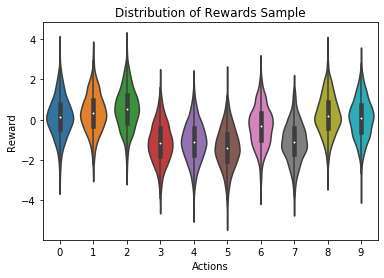

In [188]:
runDist()

In [180]:
# Gaussian distribution with 10-Arm Testbed
rtasks = 2000
steps = [1000, 3000, 5000, 7500]
#steps = [100,200,300,400]

runLearning(rtasks, steps, None)



Max Rewards per Steps increment:
[0.         0.         0.         1.55296839 0.         0.
 0.         0.         0.         0.        ]
[-2.99596218 -2.83400518  1.32790143  2.73926879 -0.24799481 -1.02519805
  0.84898715 -2.07444808 -1.74848858 -0.94730288]
1000 Steps: 3.13 was produced by Arm 5


KeyboardInterrupt: 

### Part 1 - Gaussian Distribution Testbed
As can be seen above, once the number of steps reaches 5000, epsilon of 0.01 surpasses the average reward of epsiolon=0.1. This process with the Gaussian distribution for the reward deteremined that during the 1000 steps iteration, the highest mean reward was produced by arm 7 with 4.36 but the other step iterations were so close that the difference isn't very relevant. When analyzing the total reward which is cumulative, it was found that during 5000 steps, number 8 arm was able to attain a total reward of 20,487.1.


Max Rewards per Steps increment:
2500 Steps: 0.26 was produced by Arm 5
3333 Steps: 0.2 was produced by Arm 6
5000 Steps: 0.27 was produced by Arm 5
10000 Steps: 0.27 was produced by Arm 5

Over 5000 steps, arm number 5 produced a maximum reward of 0.27



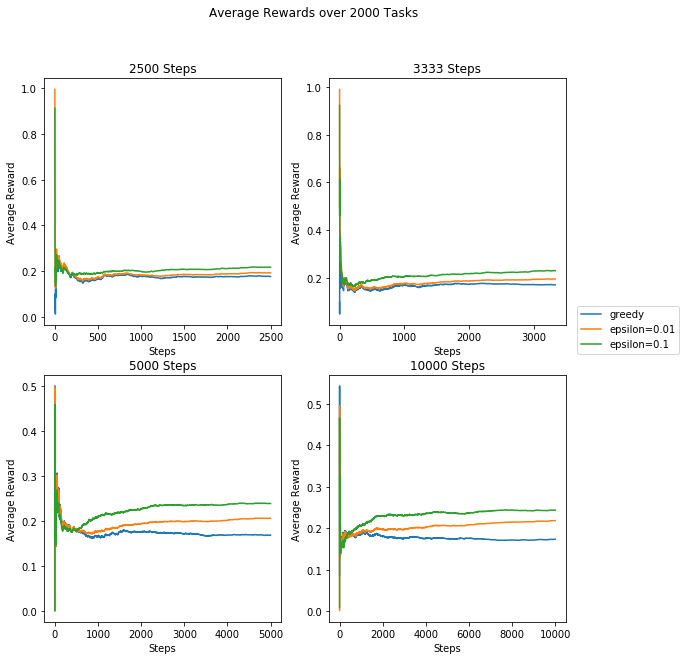

In [19]:
# Gaussian distribution for ads dataset
ads = pd.read_csv('Ads_Optimisation.csv')
rtasks = 2000
#steps = [len(ads.sample(n=int(len(ads.index)/4))), len(ads.sample(n=int(len(ads.index)/3))), len(ads.sample(n=int(len(ads.index)/2))), len(ads.index)]
steps = [2500, 5000, 7500, 10000]
# partition into 4 datasets with samples
adslist = [ads.sample(n=steps[0]).reset_index(drop=True), 
            ads.sample(n=steps[1]).reset_index(drop=True), 
            ads.sample(n=steps[2]).reset_index(drop=True), 
            ads.sample(n=steps[3]).reset_index(drop=True)]

runLearning(rtasks, steps, adslist)

### Analysis for Average Reward for the Ads dataset
The ads dataset is composed of 10 Ads that were cliked on by users at specific time steps. There were a total of 10,000 rows which translated to time steps. The process was to divide up the dataset into partitions to determine which run gives the highest reward. The partitions were in 2500, 5000, 7500, and 10,000. The rows (steps) chosen to use were chosen randomly. As can be seen from the charts above, the average mean rewards over steps was very similar with an unusual start at 1 reward with 2500 steps. The average reward stayed within a range of 0.15 through 0.25 in all different iterations. Epsilon 0.1 seemed to perform best throughout with Epsilon 0.01 trending higher as time passes and if there were more steps than the 10,000 provided it seems like it would eventually surpass Epsiolon 0.01.   
The highest mean reward came from 2500 steps iteration with arm number 8 producing 0.75 and the highest total reward came from the iteration of 10,000 steps when arm 5 produced a mean reward of 2670.